In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from skfeature.function.similarity_based import fisher_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

C:\Users\UT\AppData\Local\Temp\ipykernel_6368\1232959473.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Checking for Null Values

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking for Duplicate Values

In [5]:
data.duplicated().sum()

0

# Label Encoding

In [6]:
l = LabelEncoder()

In [7]:
data["Species"] = l.fit_transform(data["Species"])

In [8]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [9]:
data["Species"].unique()

array([0, 1, 2])

In [10]:
x = data[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = data[["Species"]]

# Checking for Outliers 

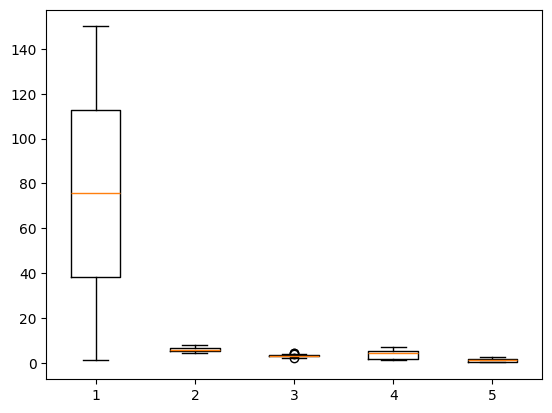

In [11]:
plt.boxplot(x)
plt.show()

# Normalization

In [12]:
n = MinMaxScaler()

In [13]:
x_norm = n.fit_transform(x)

In [14]:
df = pd.DataFrame(x_norm, columns =["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
df["Species"] = y

In [15]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,0
1,0.006711,0.166667,0.416667,0.067797,0.041667,0
2,0.013423,0.111111,0.500000,0.050847,0.041667,0
3,0.020134,0.083333,0.458333,0.084746,0.041667,0
4,0.026846,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667,2
146,0.979866,0.555556,0.208333,0.677966,0.750000,2
147,0.986577,0.611111,0.416667,0.711864,0.791667,2
148,0.993289,0.527778,0.583333,0.745763,0.916667,2


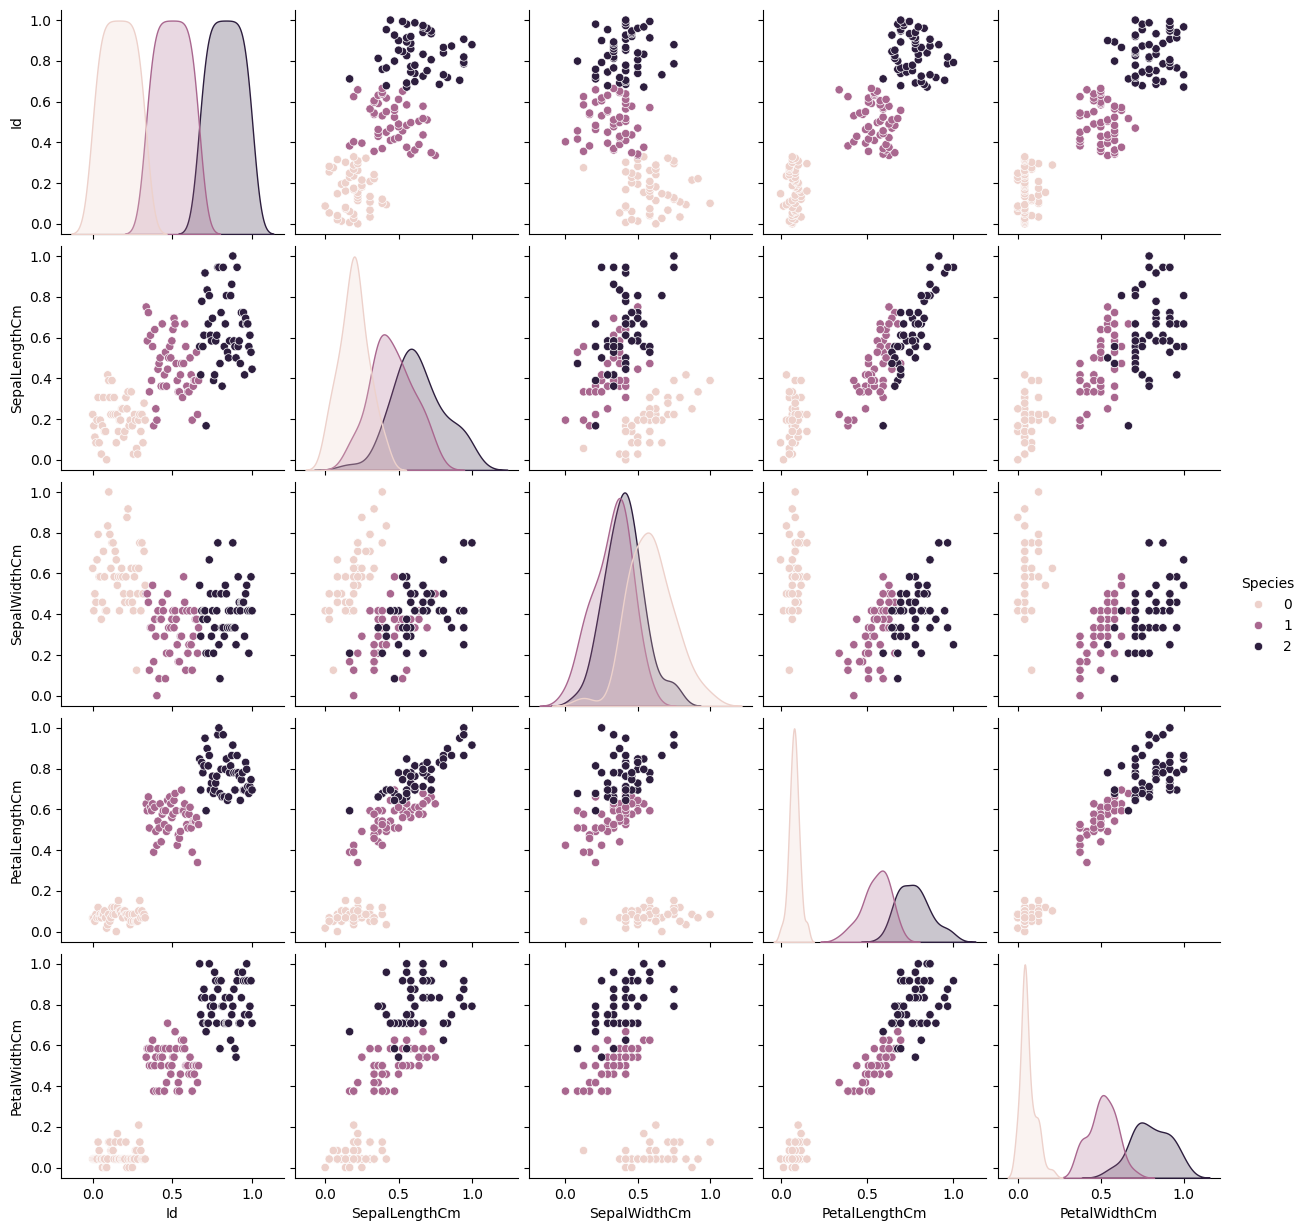

In [16]:
g = sns.pairplot(df,hue="Species") 


#  Checking for Correlation

In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

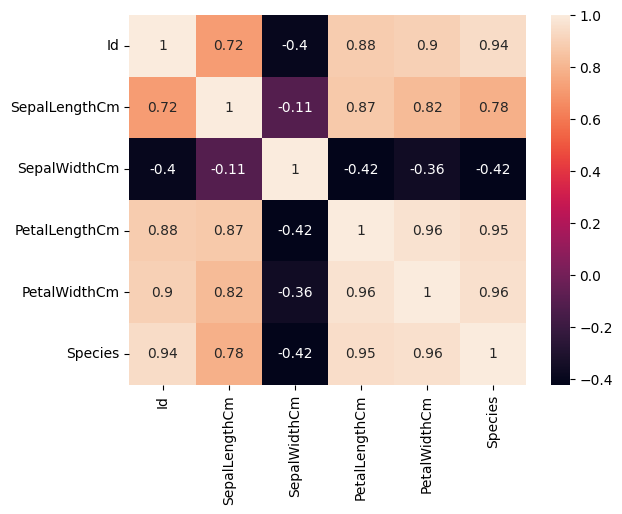

In [18]:
sns.heatmap(df.corr(),annot=True)

C:\Users\UT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


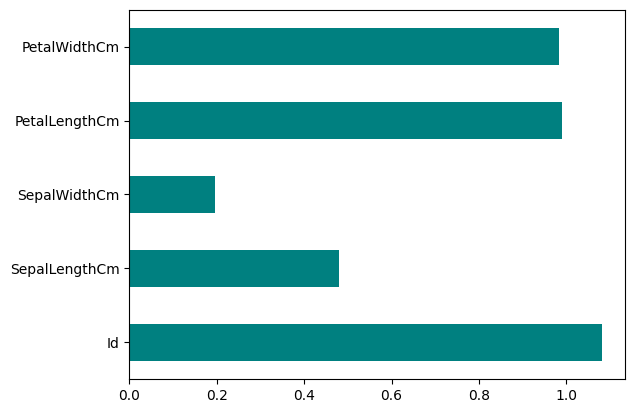

In [19]:
importances = mutual_info_classif(x,y)
feat_importances = pd.Series(importances , df.columns[0:len(df.columns)-1])
feat_importances.plot(kind = "barh",color="teal")
plt.show()

In [20]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Features Selection

In [21]:
X = df[["PetalLengthCm","PetalWidthCm"]]
Y = df[["Species"]]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [24]:
L = LogisticRegression()

In [25]:
L.fit(x_train,y_train)

C:\Users\UT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
y_pred = L.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [31]:
a = confusion_matrix(y_test,y_pred)

<Axes: >

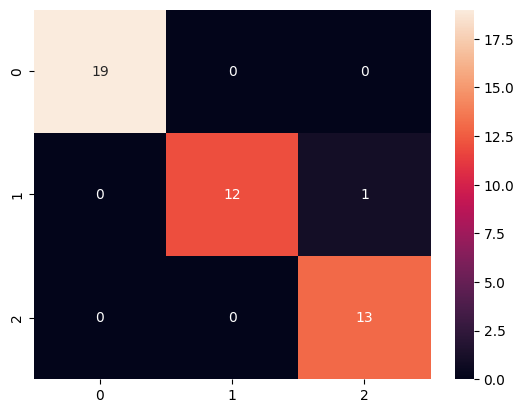

In [32]:
sns.heatmap(a, annot=True)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

